# Getting Genres from Spotify using Spotipy

In [4]:
# importing dependencies/wrappers
from nltk import FreqDist #Importing natural language toolkit (nltk) to create word frequency distribution
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import pprint
import pandas as pd
import matplotlib.pyplot as plt
from config import client_id
from api_keys import client_secret

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# importing and reading csv file
charts_2016 = "Resources/top100_2016.csv"
charts_2016 = pd.read_csv("Resources/top100_2016.csv")


# result = sp.search('Thriller',type='track')
# pprint.pprint(result)

charts_2016.head()

,No.,Title,Artist(s)
0,1,"""Love Yourself""",Justin Bieber
1,2,"""Sorry""",Justin Bieber
2,3,"""One Dance""",Drake featuring Wizkid and Kyla
3,4,"""Work""",Rihanna featuring Drake
4,5,"""Stressed Out""",Twenty One Pilots


In [5]:
# renaming columns in dataframe
charts_2016_df=charts_2016.rename(columns={"No.": "Number Ranking"})
charts_2016_df.head()

,Number Ranking,Title,Artist(s)
0,1,"""Love Yourself""",Justin Bieber
1,2,"""Sorry""",Justin Bieber
2,3,"""One Dance""",Drake featuring Wizkid and Kyla
3,4,"""Work""",Rihanna featuring Drake
4,5,"""Stressed Out""",Twenty One Pilots


In [6]:
songs = []
genres = []
for song in range(0,len(charts_2016_df['Number Ranking'])):
    
    #I put this in a try just in case the search result yields an error..or any api request yields an error
    try:
        # I search the song name and artist using spotipy, then I limit the number of search results to 1
         track = sp.search(charts_2016_df["Title"][song] + ' ' + charts_2016_df["Artist(s)"][song],limit=1)
            
            # Here I am parsing the json return to get the artists' id so I can look up the artist
         track_id = track['tracks']['items'][0]['artists'][0]['id']
        # This gets the artists' spotify profile, which includes the genres reflected in their music
         artist = sp.artist(track_id)
         genres.append(artist['genres'])
    except:
        genres.append('n/a')

In [7]:
len(genres)

100

In [8]:
# extracted genre from spotify api and input into dataframe
charts_2016_df['Genre'] = genres
charts_2016_df.head()

,Number Ranking,Title,Artist(s),Genre
0,1,"""Love Yourself""",Justin Bieber,"[canadian pop, dance pop, pop, post-teen pop]"
1,2,"""Sorry""",Justin Bieber,"[canadian pop, dance pop, pop, post-teen pop]"
2,3,"""One Dance""",Drake featuring Wizkid and Kyla,n/a
3,4,"""Work""",Rihanna featuring Drake,n/a
4,5,"""Stressed Out""",Twenty One Pilots,"[pop punk, rock]"


In [9]:
allGenres = []
for gen in charts_2016_df['Genre']:
    if gen != 'n/a':
        for b in gen:
            allGenres.append(b)
len(allGenres)
allGenres

['canadian pop',
 'dance pop',
 'pop',
 'post-teen pop',
 'canadian pop',
 'dance pop',
 'pop',
 'post-teen pop',
 'pop punk',
 'rock',
 'dwn trap',
 'hip hop',
 'pop',
 'pop rap',
 'rap',
 'southern hip hop',
 'trap music',
 'underground hip hop',
 'pop',
 'dance pop',
 'pop',
 'danish pop',
 'dance pop',
 'pop',
 'post-teen pop',
 'r&b',
 'urban contemporary',
 'dance pop',
 'edm',
 'pop',
 'pop rap',
 'dance pop',
 'edm',
 'pop',
 'pop rap',
 'dance pop',
 'pop',
 'post-teen pop',
 'tropical house',
 'hip hop',
 'indie pop rap',
 'pop',
 'pop rap',
 'rap',
 'pop punk',
 'rock',
 'pop punk',
 'rock',
 'dance pop',
 'pop',
 'post-teen pop',
 'canadian pop',
 'dance pop',
 'pop',
 'post-teen pop',
 'viral pop',
 'canadian hip hop',
 'canadian pop',
 'hip hop',
 'pop rap',
 'rap',
 'pop',
 'canadian pop',
 'dance pop',
 'pop',
 'post-teen pop',
 'viral pop',
 'canadian pop',
 'dance pop',
 'pop',
 'post-teen pop',
 'canadian pop',
 'pop',
 'rap',
 'dance pop',
 'pop',
 'post-teen pop',


In [10]:
setofgenres=set(allGenres)
setofgenres

{'boy band',
 'canadian hip hop',
 'canadian pop',
 'contemporary country',
 'country',
 'country road',
 'dance pop',
 'danish pop',
 'dwn trap',
 'edm',
 'electropop',
 'hip hop',
 'hip pop',
 'indie pop rap',
 'indie poptimism',
 'indie r&b',
 'metropopolis',
 'modern alternative rock',
 'modern country rock',
 'modern rock',
 'neo mellow',
 'permanent wave',
 'pinoy hip hop',
 'pop',
 'pop punk',
 'pop rap',
 'pop rock',
 'post-teen pop',
 'r&b',
 'rap',
 'rock',
 'southern hip hop',
 'stomp pop',
 'talent show',
 'trap music',
 'tropical house',
 'underground hip hop',
 'urban contemporary',
 'viral pop'}

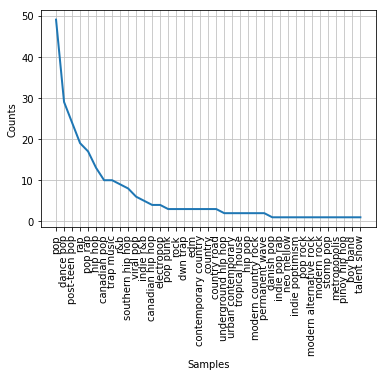

In [11]:
#I use FreqDist to automatically count the number of times a certain word, in this case genre, appears in the list
genreDist = FreqDist(allGenres)

#This is a plot of the frequency distribution. I believe there is much work to be done in terms of visualization
# but I believe this is a start
# genreDist
genreDist.plot()

In [12]:
genreDist

FreqDist({'pop': 49, 'dance pop': 29, 'post-teen pop': 24, 'rap': 19, 'pop rap': 17, 'hip hop': 13, 'canadian pop': 10, 'trap music': 10, 'r&b': 9, 'southern hip hop': 8, ...})

In [13]:
genre_dataframe = pd.DataFrame.from_dict(genreDist, orient='index', columns=['Genre Count'])

genre_dataframe.head()
genre_dataframe.index.name="Genre Name"

# sorting the genre count in descending order, this is to help us see the top main genres with their sub-genres, this will later help us for the stacked bar dataframe
genre_dataframe.sort_values(by="Genre Count", ascending=False)

,Genre Count
Genre Name,
pop,49
dance pop,29
post-teen pop,24
rap,19
pop rap,17
hip hop,13
canadian pop,10
trap music,10
r&b,9


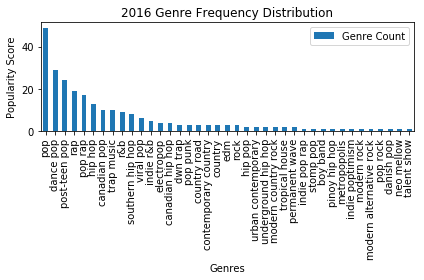

In [27]:
# created a frequency distribution of all the genres/subgenres
genre_dataframe.sort_values("Genre Count", ascending=False).plot.bar()
plt.title("2016 Genre Frequency Distribution")
plt.xlabel("Genres")
plt.ylabel("Popularity Score")
plt.tight_layout()
plt.savefig("Images/frequency2016.png")

In [28]:
# grouping and counting the subgenres by categorizing them into main genres
popCount = 0
rapCount = 0
edmCount = 0
countryCount=0
otherCount = 0
for genre in allGenres:
   if 'pop' in genre:
       popCount = popCount + 1
   elif('rap' or 'hip hop' or 'trap') in genre:
       rapCount = rapCount + 1
   elif('edm' or 'electro' or 'techno' or 'tropical') in genre:
       edmCount = edmCount + 1
   else:
       otherCount = otherCount + 1

condensedGenre = ['Pop','Rap/Hip-Hop','EDM','Other']
summarizedGenres = pd.DataFrame({"Music Genres":condensedGenre, "Genre Count":[popCount,rapCount,edmCount,otherCount]})
summarizedGenres

,Music Genres,Genre Count
0,Pop,150
1,Rap/Hip-Hop,32
2,EDM,3
3,Other,67


Text(0.5,0,'Music Genres')

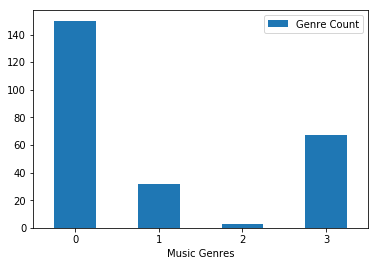

In [29]:
index = ['Pop', 'Rap/Hip-Hop', 'EDM']
summarizedGenres.plot(kind='bar', stacked=True, rot=0)
plt.xlabel("Music Genres")

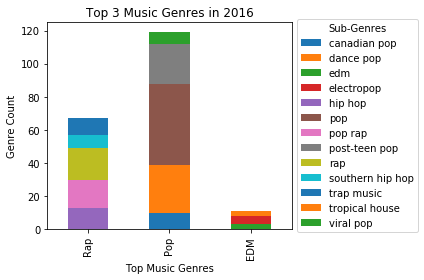

In [30]:
# created a dataframe for the top 3 music genres. used a stacked bar graph to visualize the main genre with its sub-genres
data = pd.DataFrame([
        ('Pop','pop', 49),
        ('Pop','dance pop', 29),
        ('Pop','post-teen pop', 24),
        ('Pop','canadian pop', 10),
        ('Pop','viral pop', 7),
        ('Rap','rap', 19),
        ('Rap','pop rap', 17),
        ('Rap','hip hop', 13),
        ('Rap','trap music', 10),
        ('Rap','southern hip hop', 8),
        ('EDM','electropop', 5),
        ('EDM','edm', 3),
        ('EDM','tropical house', 3),
    ], 
    columns=['Top Music Genres', 'Sub-Genres', 'value']
)
data = data.set_index(['Top Music Genres', 'Sub-Genres']).value

data.unstack().sort_index(ascending=False).plot(kind='bar', stacked=True)
plt.title("Top 3 Music Genres in 2016")
plt.legend(title="Sub-Genres",loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Genre Count")
# data.sort_index(ascending=False)
plt.tight_layout()
plt.savefig("Images/stackedbar2016.png")